<a href="https://colab.research.google.com/github/ishaan-arya/twitter-sentiment-analysis-for-stock-prediction/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from sklearn.utils import shuffle
import nltk
import re

from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import twitter_samples 

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC

In [6]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(X_test), y_test)
print('accuracy_score_mnb = '+str('{:04.2f}'.format(accuracy_score_mnb*100))+'%')

accuracy_score_mnb = 59.25%


In [7]:
GNB = GaussianNB()
GNB.fit(X_train.todense(), y_train)
accuracy_score_gnb = metrics.accuracy_score(GNB.predict(X_test.todense()), y_test)
print('accuracy_score_gnb = '+str('{:04.2f}'.format(accuracy_score_gnb*100))+'%')

accuracy_score_gnb = 56.25%


In [8]:
BNB = BernoulliNB()
BNB.fit(X_train.todense(), y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(X_test.todense()), y_test)
print('accuracy_score_bnb = '+str('{:04.2f}'.format(accuracy_score_bnb*100))+'%')

accuracy_score_bnb = 59.20%


In [22]:
rf_classifier = RandomForestClassifier(n_estimators = 30)
classifier = rf_classifier.fit(X_train, y_train)
accuracy_score_rf = metrics.accuracy_score(classifier.predict(X_test), y_test)
print('accuracy_score_rf = '+str('{:04.2f}'.format(accuracy_score_rf*100))+'%')

accuracy_score_rf = 59.25%


In [ ]:
LSVC = LinearSVC()
LSVC.fit(X_train, y_train)
accuracy_score_lsvc = metrics.accuracy_score(LSVC.predict(X_test), y_test)
print('accuracy_score_lsvc = '+str('{:04.2f}'.format(accuracy_score_lsvc*100))+'%')

accuracy_score_lsvc = 59.15%


In [ ]:
SGDC = SGDClassifier()
SGDC.fit(X_train, y_train)
accuracy_score_sgdc = metrics.accuracy_score(SGDC.predict(X_test), y_test)
print('accuracy_score_sgdc = '+str('{:04.2f}'.format(accuracy_score_sgdc*100))+'%')

accuracy_score_sgdc = 59.20%


In [24]:
from sklearn.svm import SVC

svc = SVC(C=1000)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score_svc = metrics.accuracy_score(y_pred, y_test)
print('accuracy_score_svc = '+str('{:04.2f}'.format(accuracy_score_svc*100))+'%')

accuracy_score_svc = 59.20%


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='newton-cg')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score_logistic = metrics.accuracy_score(y_pred, y_test)
print('accuracy_score_logistic = '+str('{:04.2f}'.format(accuracy_score_logistic*100))+'%')

accuracy_score_logistic = 59.15%


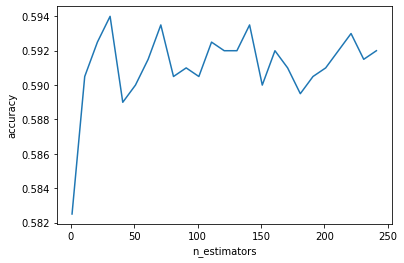

In [13]:
#finding optimal n-estimators 
import matplotlib.pyplot as plt

accuracy = []
arr = []
i=1
count = 0
while i<250:
  rf_classifier = RandomForestClassifier(n_estimators = i)
  classifier = rf_classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy_score_rf = metrics.accuracy_score(classifier.predict(X_test), y_test)
  accuracy.append(metrics.accuracy_score(y_pred, y_test))
  arr.append(i)
  count = count+1
  i=i+10
plt.plot(arr,accuracy) 
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

In [4]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [54]:
import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [56]:
df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [57]:
df_clean = df.drop(['textID', 'selected_text'], axis = 1)
df_clean.text=df_clean.text.astype(str)
df_clean

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


In [58]:
def clean_tweet(token):
    token = token.lower()
    token = re.sub(r'@[a-z0-9_]\S+','', token)
    token = re.sub(r'#[a-z0-9_]\S+','', token)
    token = re.sub(r'&[a-z0-9_]\S+','', token)
    token = re.sub(r'[?!.+,;$£%&"*`]+','', token)
    token = re.sub(r'rt[\s]+','', token)
    token = re.sub(r'\d+','', token)
    token = re.sub(r'\$', '', token)
    token = re.sub(r'rt+','', token)
    token = re.sub(r'https?:?\/\/\S+','', token)
    return token

In [59]:
df_clean['text'] = df_clean['text'].apply(lambda x:clean_tweet(x))
df_clean

,text,sentiment
0,id have responded if i were going,neutral
1,sooo sad i will miss you here in san diego,negative
2,my boss is bullying me,negative
3,what interview leave me alone,negative
4,sons of why couldnt they put them on the rel...,negative
...,...,...
27476,wish we could come see u on denver husband l...,negative
27477,ive wondered about rake to the client has ma...,negative
27478,yay good for both of you enjoy the break - yo...,positive
27479,but it was woh it,positive


In [60]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
stop_words = set(stopwords.words('english')) 

def remove_stop_words(tweet):
    word_tokens = word_tokenize(tweet) 
    filtered_tweet = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_tweet.append(w)
    return ' '.join(filtered_tweet)

df_clean['text'] = df_clean['text'].apply(lambda x:remove_stop_words(x))  

In [62]:
df_clean

,text,sentiment
0,id responded going,neutral
1,sooo sad miss san diego,negative
2,boss bullying,negative
3,interview leave alone,negative
4,sons couldnt put releases already bought,negative
...,...,...
27476,wish could come see u denver husband lost job ...,negative
27477,ive wondered rake client made clear net dont f...,negative
27478,yay good enjoy break - probably need hectic we...,positive
27479,woh,positive


In [63]:
df_clean['sentiment'] = df_clean['sentiment'].replace(['neutral'],'0')
df_clean['sentiment'] = df_clean['sentiment'].replace(['positive'],'1')
df_clean['sentiment'] = df_clean['sentiment'].replace(['negative'],'-1')
df_clean

,text,sentiment
0,id responded going,0
1,sooo sad miss san diego,-1
2,boss bullying,-1
3,interview leave alone,-1
4,sons couldnt put releases already bought,-1
...,...,...
27476,wish could come see u denver husband lost job ...,-1
27477,ive wondered rake client made clear net dont f...,-1
27478,yay good enjoy break - probably need hectic we...,1
27479,woh,1


In [65]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vectorizer = CountVectorizer(max_features = 5000, ngram_range=(1, 3), stop_words='english')
count_vectors = vectorizer.fit_transform(df_clean['text'])
X = count_vectors.toarray()
y = df_clean['sentiment'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [69]:
X_train.shape

(21984, 5000)

In [70]:
X_test.shape

(5497, 5000)

In [66]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
accuracy_score_mnb = metrics.accuracy_score(MNB.predict(X_test), y_test)
print('accuracy_score_mnb = '+str('{:04.2f}'.format(accuracy_score_mnb*100))+'%')

accuracy_score_mnb = 64.71%


In [67]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
accuracy_score_gnb = metrics.accuracy_score(GNB.predict(X_test), y_test)
print('accuracy_score_gnb = '+str('{:04.2f}'.format(accuracy_score_gnb*100))+'%')

accuracy_score_gnb = 41.99%


In [68]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train, y_train)
accuracy_score_bnb = metrics.accuracy_score(BNB.predict(X_test), y_test)
print('accuracy_score_bnb = '+str('{:04.2f}'.format(accuracy_score_bnb*100))+'%')

accuracy_score_bnb = 64.58%


In [71]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 100)
classifier = rf_classifier.fit(X_train, y_train)
accuracy_score_rf = metrics.accuracy_score(classifier.predict(X_test), y_test)
print('accuracy_score_rf = '+str('{:04.2f}'.format(accuracy_score_rf*100))+'%')

accuracy_score_rf = 68.00%


In [72]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='newton-cg')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score_logistic = metrics.accuracy_score(y_pred, y_test)
print('accuracy_score_logistic = '+str('{:04.2f}'.format(accuracy_score_logistic*100))+'%')

accuracy_score_logistic = 67.55%


In [ ]:
from sklearn.svm import SVC

svc = SVC(C=1000)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score_svc = metrics.accuracy_score(y_pred, y_test)
print('accuracy_score_svc = '+str('{:04.2f}'.format(accuracy_score_svc*100))+'%')
